# Compressão de dados, parte 2
## Aula 14

### Compressão com perda

* Comumente utilizado para compressão de imagens, áudio e vídeo;
* Frequentemente trabalha-se em outro domínio (e.g.: domínio da frequência);
* Tentam se adequar baseado nos limites da percepção;
* Normalmente as perdas são irreversíveis.

Alguns métodos de compressão incluem:
* Fractal;
* DCT;
* Quantização;
* Wavelet;
* JPEG;
* MP3;
* Dentre outros.

### Compressão sem perda vs. com perda

* Na compressão sem perda, obtem-se os mesmos dados que existiam antes da compressão;
* Na compressão com perda, ao descomprimir, os dados resultantes podem ter partes perdidas;
* A compressão com perda deve ser utilizada somente em contextos em que a perda de dados não é importante (contraexemplos: imagens médicas e documentos de texto);
* Normalmente, a compressão com perda gera dados menores do que aqueles sem perda.

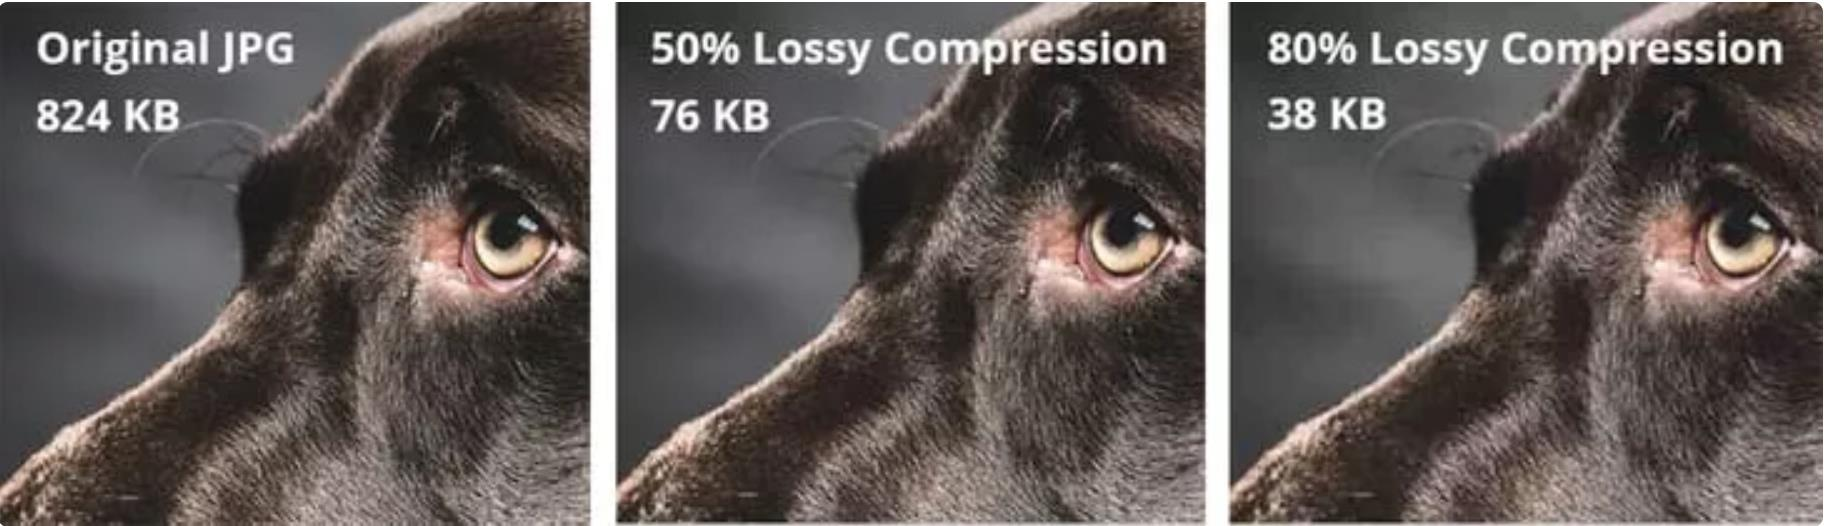

## JPEG

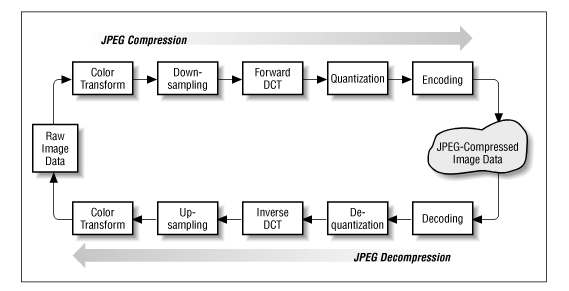

### Visão geral do algoritmo

O fluxo de compressão de um JPEG é realizado com os seguintes passos:
* A imagem é convertida para um espaço de cores baseado em crominância, tal como o [YCbCr](https://en.wikipedia.org/wiki/YCbCr);
* Fazer a subamostragem dos componentes de crominância;
    * Estes espaços de cores se baseiam no fato que a visão humana é menos sensível à crominância;
    * Com isso, é possível remover dados referentes à crominância em blocos 2x2, visto que essa remoção é imperceptível;
* Aplicar a DCT em blocos 8x8;
* Quantizar cada bloco;
* Codificar os dados com algum método de compressão para remover redundâncias, com codificação zigzag, tal como RLE seguido de Huffman.

### Subamostragem

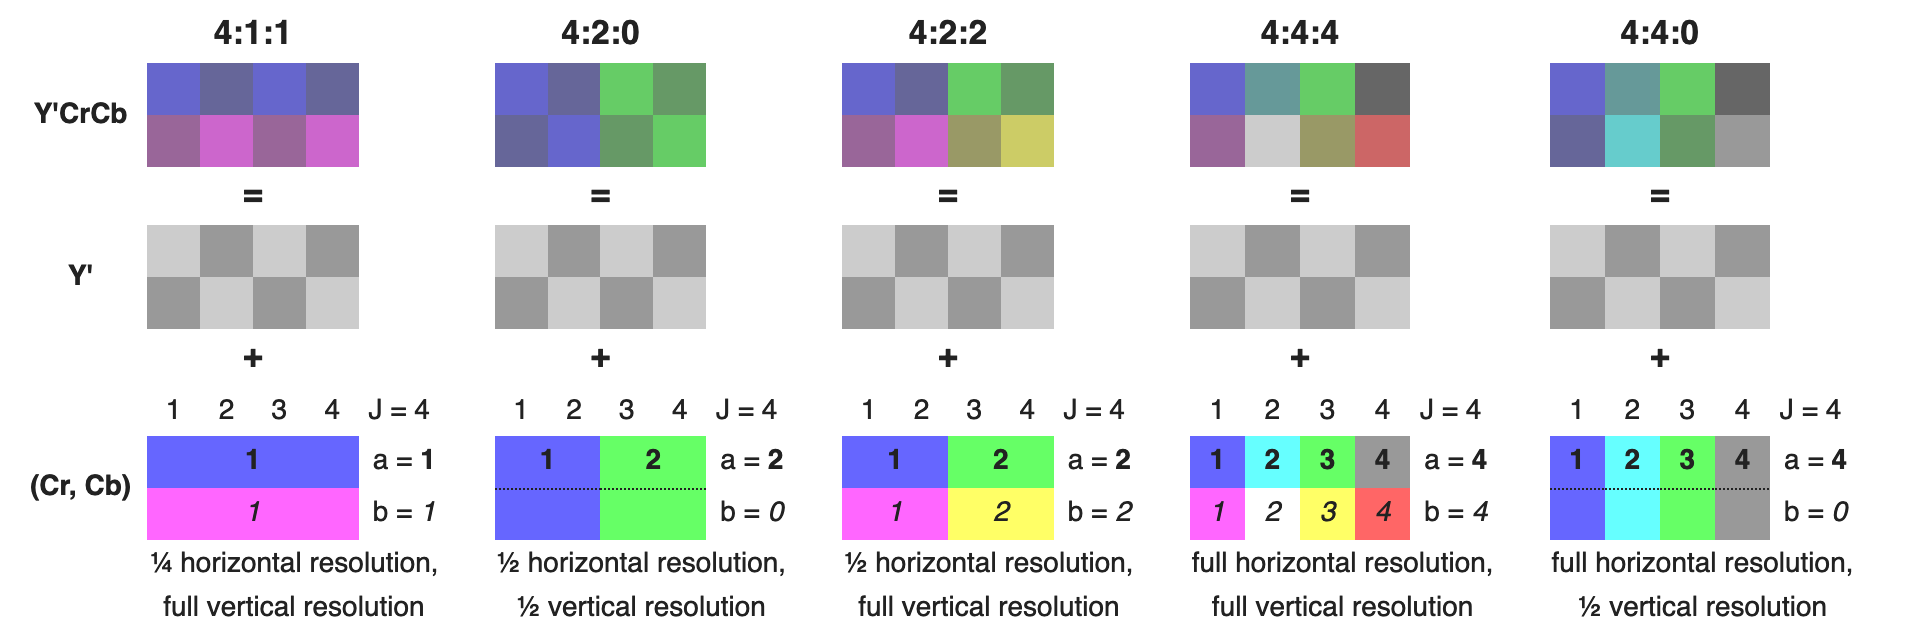

### DCT

* Transformada discreta de cosseno (*Discrete Cosine Transform*, DCT);
* Implementações notáveis incluem MP3 e JPEG;
* Expressa uma sequência finita de pontos de dados em termos de uma soma de funções de cosseno;
* Normalmente, faz parte de uma sequência de passos de compressão de uma imagem.

<div>
    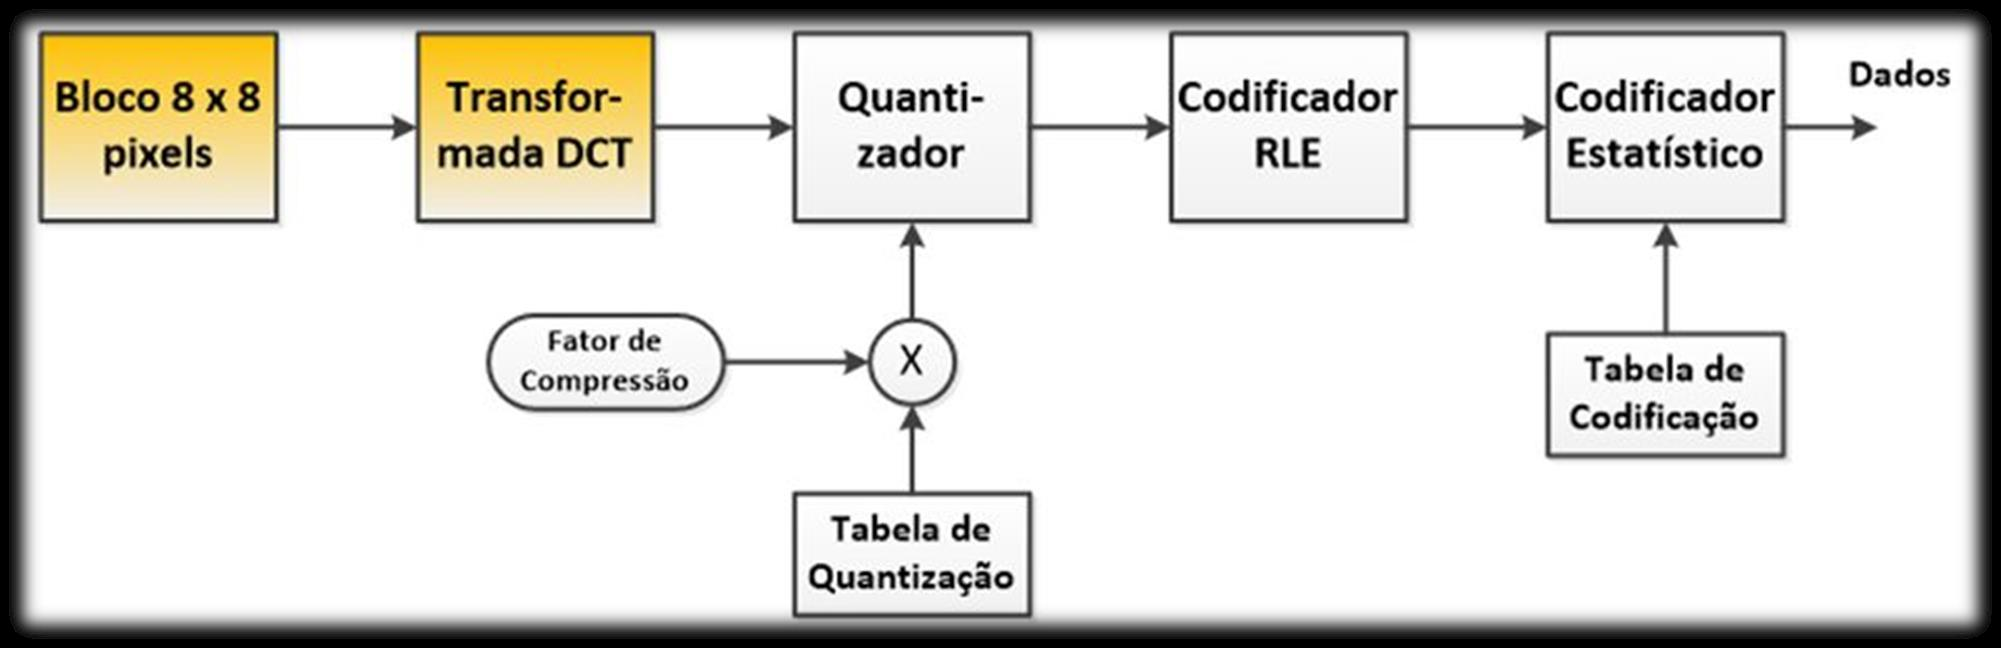
</div>

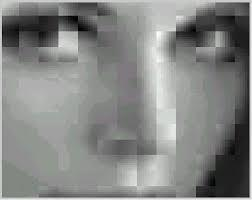

Existem várias variantes da DCT com definições ligeiramente modificadas. A DCT-II é uma das mais utilizadas, e muitas vezes é chamada de simplesmente "DCT".

$$X_k=\sum_{n=0}^{N-1}x_n\cos\left[\frac{\pi}{N}\left(n+\frac{1}{2}\right)k\right]\quad k=0,\dots,N-1$$

Na qual:
* $x$: Valor de entrada;
* $k$: O índice do coeficiente de saída sendo computado;
* $X$: Saída do DCT;
* $N$: Quantidade de valores.

#### DCTs multidimensionais

* Por exemplo, podemos usar a DCT-II bidimensional para uma imagem ou matriz;
* É simplesmente a DCT-II unidimensional realizada ao longo das linhas e depois das colunas (ou vice-versa).

$$\begin{align*}
X_{k_1,k_2}&=\alpha_{k_1}\sum_{n_1=0}^{N_1-1}\alpha_{k_2}\left(\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\right)\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\\
&=\alpha_{k_1}\alpha_{k_2}\sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\quad k_1,k_2=0,\dots,N-1
\end{align*}$$

$\alpha_{k_1}=\begin{cases}
    \frac{1}{\sqrt{N_1}}, & \text{se}\ k_1=0\\
    \sqrt{\frac{2}{N_1}}, & \text{caso contrário}
\end{cases}$

$\alpha_{k_2}=\begin{cases}
    \frac{1}{\sqrt{N_2}}, & \text{se}\ k_2=0\\
    \sqrt{\frac{2}{N_2}}, & \text{caso contrário}
\end{cases}$

<div>
    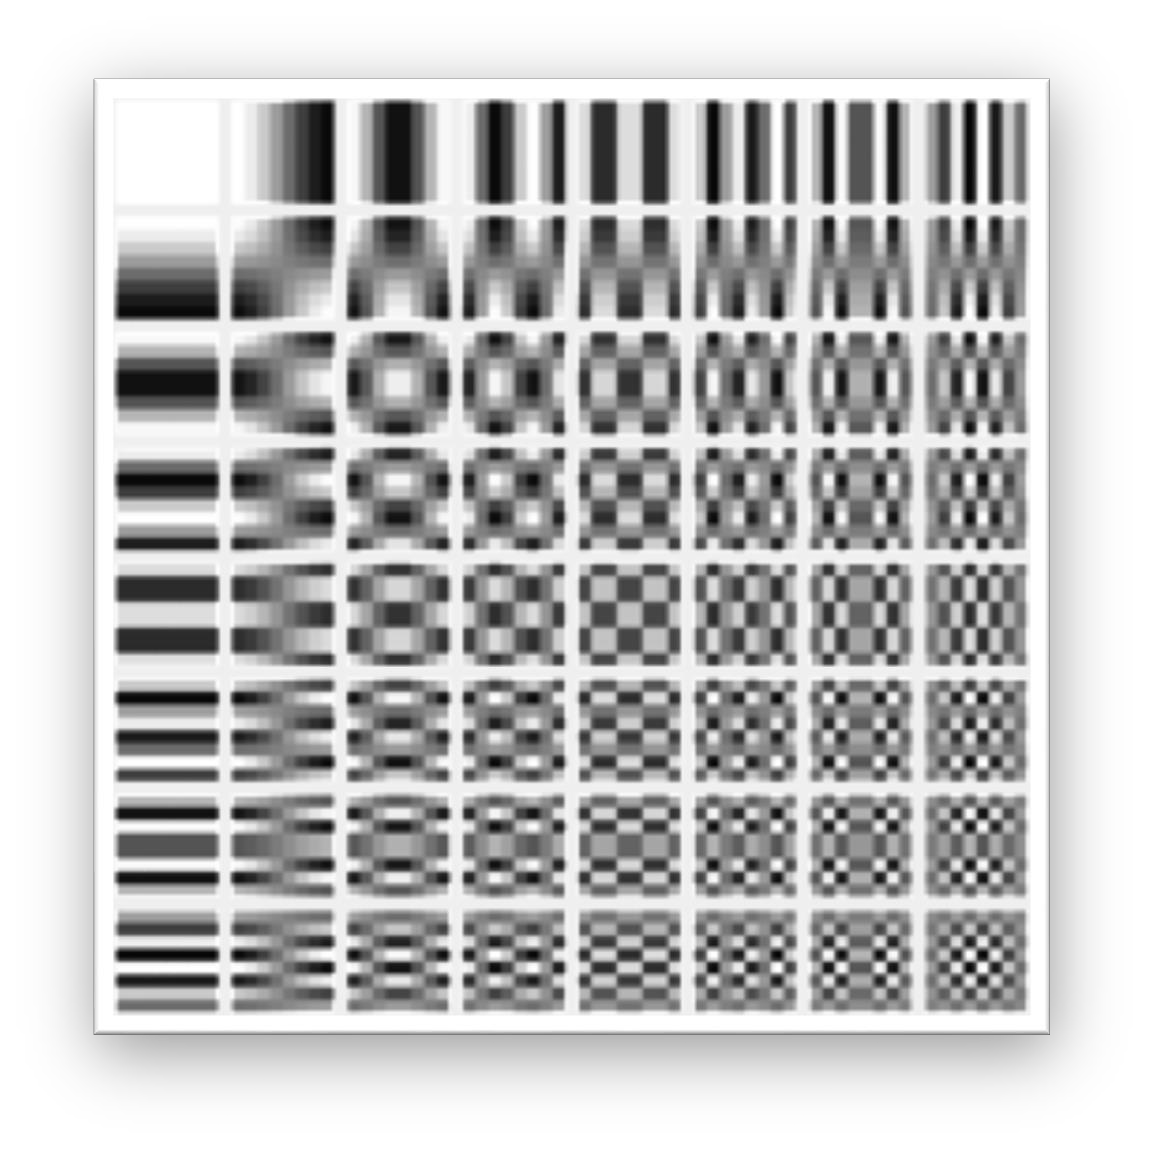
</div>

* A DCT-II tridimensional é a extensão da DCT-II no espaço tridimensional, sendo adequada para vídeos.

$$X_{k_1,k_2,k_3}=\sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}\sum_{n_3=0}^{N_3-1}x_{n_1,n_2,n_3}\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\cos\left[\frac{\pi}{N_3}\left(n_3+\frac{1}{2}\right)k_3\right]\quad k_1,k_2,k_3=0,\dots,N-1$$

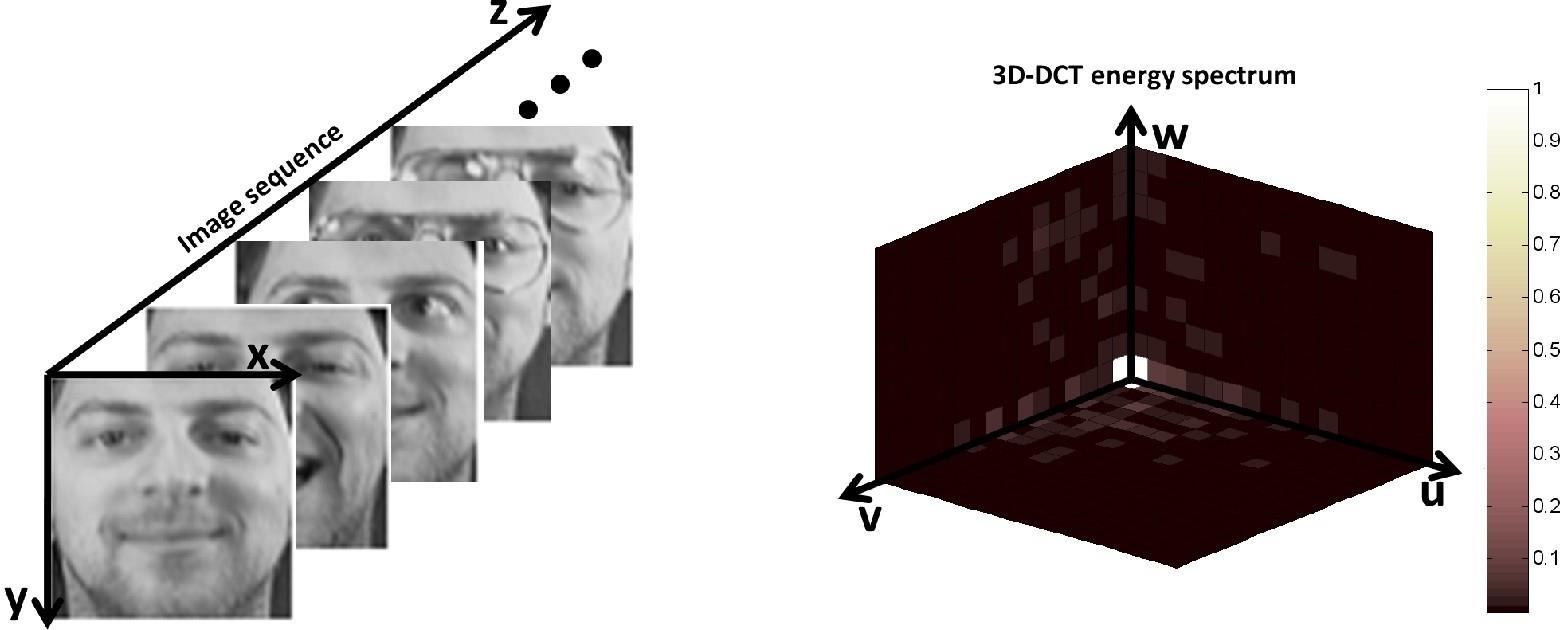

Feita a transformada, um passo comum é quantizar a imagem e depois aplicar um ou mais métodos de compressão sem perda (e.g.: RLE e Huffman).


### Inversa da DCT-II

* A inversa da DCT-II é dada pela DCT-III (frequentemente chamada de IDCT):

$$x_n=\sum_{k=0}^{N-1}X_k\cos\left[\frac{\pi}{N}n\left(k+\frac{1}{2}\right)\right]\quad n=0,\dots,N-1$$

Semelhantemente, para a versão bidimensional:

$$x_{n_1,n_2}=\sum_{k_1=0}^{N_1-1}\sum_{k_2=0}^{N_2-1}\alpha_{k_1}\alpha_{k_2}X_{k_1,k_2}\cos\left[\frac{\pi}{N_1}n_1\left(k_1+\frac{1}{2}\right)\right]\cos\left[\frac{\pi}{N_2}n_2\left(k_2+\frac{1}{2}\right)\right]\quad n_1,n_2=0,\dots,N-1$$

Na qual:
* $x$: Saída do IDCT;
* $n$: O índice do coeficiente de saída sendo computado;
* $X$: Pixel de entrada;
* $N$: Quantidade de valores.

#### Complexidade

* A computação da DCT-II uni-, bi- e tridimensional tem complexidade $O(n^2)$, $O(n^4)$ e $O(n^6)$, respectivamente;
* Sendo assim, é comum particionar a imagem em blocos menores e aplicar a transformada em cada um destes blocos;
* Devido ao rápido crescimento das aplicações com base no DCT 3D, vários algoritmos rápidos são desenvolvidos para o cálculo da DCT-3D;
* Os algoritmos Vector-Radix ou baseados em FFT (*Fast Fourier Transform*) para reduzir a complexidade computacional e aumentar a velocidade.

### Quantização

* Quantização consiste em mapear valores de entrada em um conjunto menor de saída (e.g.: arredondamento e truncamento);
* Não faz compressão por si, mas pode ser utilizada para comprimir através de outros métodos (e.g.: RLE);
* Quando a quantidade de símbolos em um fluxo de dados é reduzida, o fluxo se torna mais comprimível.

|Quantização de 2-bits|Quantização de 3-bits|
|-|-|
|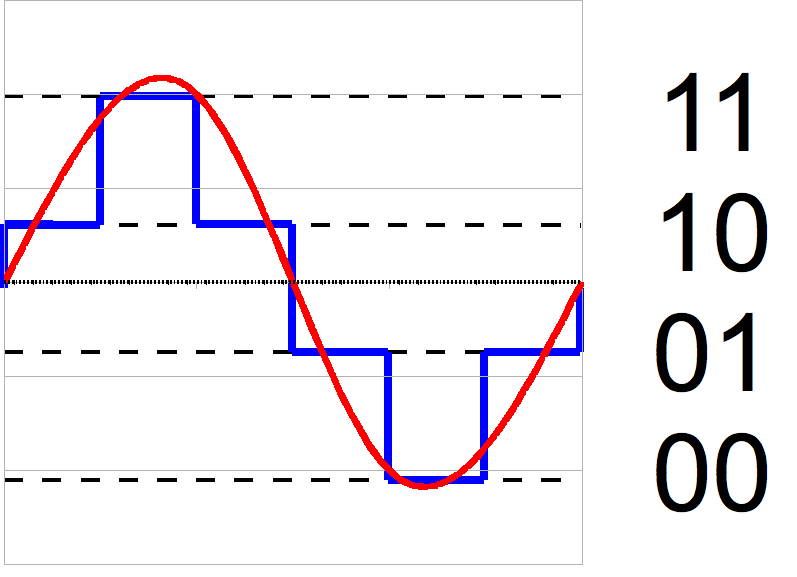|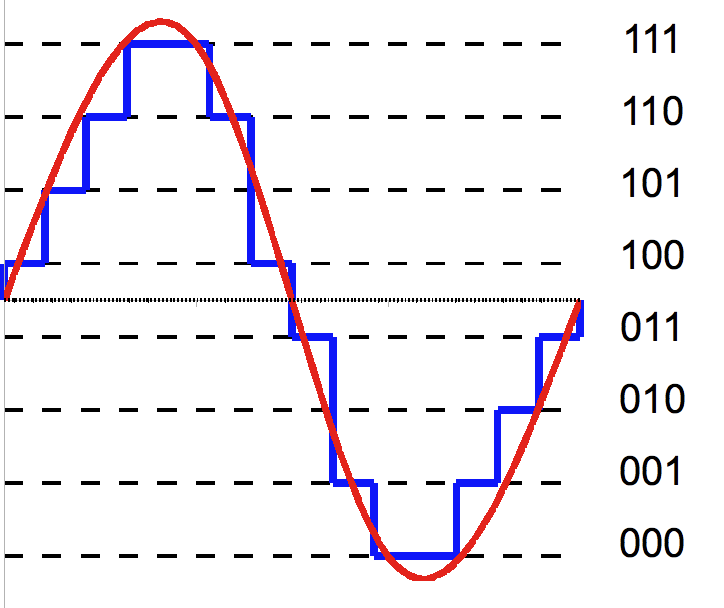|

### Quantização de cores

* Consiste em reduzir o número de cores distintas na imagem.

|Imagem de entrada|A mesma imagem quantizada com 16 cores|
|-|-|
|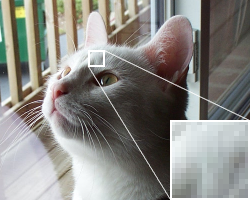|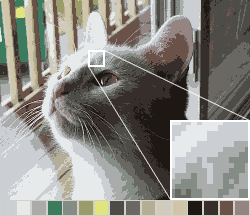|

### Quantização de frequência

* Uma forma de quantizar uma imagem ou matriz é dividí-la ponto-a-ponto por um determinado valor, e depois arredondá-la.

$$Q(x)=\Delta\cdot\left\lfloor\frac{x}{\Delta}+\frac{1}{2}\right\rfloor$$

Na qual:
* $\lfloor\rfloor$ é a função *floor*;
* $\Delta$ é um valor de quantização.

In [1]:
import numpy as np

values = np.array([13, 10, 9, 141, -4, 2, 260, 289, 120, -498])
delta = 10 # quantização para múltiplos de 10
quantized = delta * np.floor(values / delta + 0.5)
print(quantized)

[  10.   10.   10.  140.    0.    0.  260.  290.  120. -500.]


### Matrizes de quantização

* Alguns compressores de imagem e vídeo funcionam dividindo a matriz em matrizes menores (tal como 8x8) e dividindo cada elemento por uma matriz pré-determinada;
* Tais matrizes são conhecidas como matrizes de quantização.

Como exemplo, utilizando a seguinte matriz de coeficientes após uma DCT:


Uma matriz de quantização comum é:


Dividindo a primeira matriz ponto-a-ponto pela segunda, e arredondando os valores para o inteiro mais próximo, obtem-se:


Tipicamente, isso resulta em matrizes com os valores definidos no canto superior-esquerdo. Usando um codificador zig-zag, pode-se comprimir a matriz eficientemente utilizando um método tal como RLE.

|Codificação zigzag|
|-|
|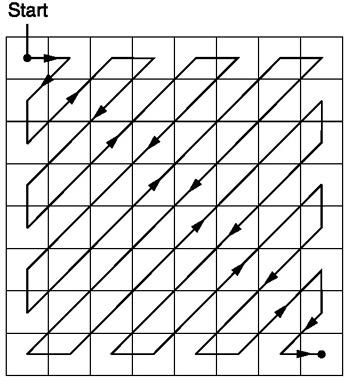|

# Exercícios

1. Implemente a DCT-II para uma imagem em escala de cinza. Utilize o método de *grayscale* de sua escolha.

Obs.: A DCT-II 2D apresentada possui complexidade `O(n⁴)`. Sendo assim, considere que a imagem tem altura e largura múltiplos de 8 e aplique a DCT em blocos 8x8. Veja imagens contidas na sua pasta.

$$\begin{align*}
X_{k_1,k_2}&=\alpha_{k_1}\sum_{n_1=0}^{N_1-1}\alpha_{k_2}\left(\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\right)\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\\
&=\alpha_{k_1}\alpha_{k_2}\sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\quad k_1,k_2=0,\dots,N-1
\end{align*}$$

$\alpha_{k_1}=\begin{cases}
    \frac{1}{\sqrt{N_1}}, & \text{se}\ k_1=0\\
    \sqrt{\frac{2}{N_1}}, & \text{caso contrário}
\end{cases}$

$\alpha_{k_2}=\begin{cases}
    \frac{1}{\sqrt{N_2}}, & \text{se}\ k_2=0\\
    \sqrt{\frac{2}{N_2}}, & \text{caso contrário}
\end{cases}$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

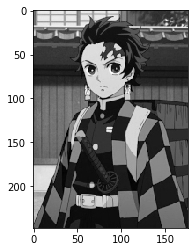

In [3]:
img = np.array(Image.open("tanjirou_small.jpg"))[:, :, :3]
gray = np.average(img, axis=2).astype(np.uint8)
l, c = gray.shape
plt.imshow(gray, cmap='gray')

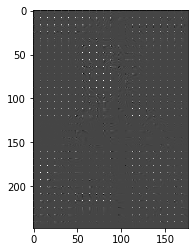

In [4]:
def dct(img):
    N1, N2 = img.shape

    dct = np.zeros(shape=img.shape)
    for k1 in range(N1): # for i in range(l)
        if k1 == 0:
            a1 = 1 / np.sqrt(N1)
        else:
            a1 = np.sqrt(2 / N1)

        for k2 in range(N2): # for j in range(c)
            sum_n1 = 0

            for n1 in range(N1):
                sum_n2 = 0
                for n2 in range(N2):
                    x = img[n1, n2]
                    sum_n2 += x * np.cos(np.pi / N2 * (n2 + 0.5) * k2)

                sum_n1 += sum_n2 * np.cos(np.pi / N1 * (n1 + 0.5) * k1)

            if k2 == 0:
                a2 = 1 / np.sqrt(N2)
            else:
                a2 = np.sqrt(2 / N2)

            dct[k1, k2] = sum_n1 * a1 * a2

    return dct

img_dct = np.zeros(shape=gray.shape)

block_size = 8
num_blocks_l = l // block_size
num_blocks_c = c // block_size

for b1 in range(num_blocks_l):
    i = b1 * block_size
    for b2 in range(num_blocks_c):
        j = b2 * block_size
        x = gray[i:i + block_size, j:j + block_size]
        img_dct[i:i + block_size, j:j + block_size] = dct(x)

plt.imshow(img_dct, cmap='gray')

2. Implemente a DCT-III (IDCT) para reverter a DCT-II implementada no exercício acima.

$$x_{n_1,n_2}=\sum_{k_1=0}^{N_1-1}\sum_{k_2=0}^{N_2-1}\alpha_{k_1}\alpha_{k_2}X_{k_1,k_2}\cos\left[\frac{\pi}{N_1}n_1\left(k_1+\frac{1}{2}\right)\right]\cos\left[\frac{\pi}{N_2}n_2\left(k_2+\frac{1}{2}\right)\right]\quad n_1,n_2=0,\dots,N-1$$

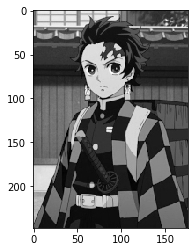

In [5]:
def idct(img):
    N1, N2 = img.shape

    idct = np.zeros(shape=img.shape)
    for n1 in range(N1): # for i in range(l)
        for n2 in range(N2): # for j in range(c)
            sum_k1 = 0

            for k1 in range(N1):
                if k1 == 0:
                    a1 = 1 / np.sqrt(N1)
                else:
                    a1 = np.sqrt(2 / N1)

                sum_k2 = 0
                for k2 in range(N2):
                    if k2 == 0:
                        a2 = 1 / np.sqrt(N2)
                    else:
                        a2 = np.sqrt(2 / N2)

                    x = img[k1, k2]
                    sum_k2 += x * np.cos(np.pi / N2 * (n2 + 0.5) * k2) * a2

                sum_k1 += sum_k2 * np.cos(np.pi / N1 * (n1 + 0.5) * k1) * a1

            idct[n1, n2] = sum_k1

    return idct

img_idct = np.zeros(shape=img_dct.shape)

for b1 in range(num_blocks_l):
    i = b1 * block_size
    for b2 in range(num_blocks_c):
        j = b2 * block_size
        x = img_dct[i:i + block_size, j:j + block_size]
        img_idct[i:i + block_size, j:j + block_size] = idct(x)

plt.imshow(img_idct, cmap='gray')

# Referências

* https://en.wikipedia.org/wiki/Discrete_cosine_transform
* http://www.lcs.poli.usp.br/~gstolfi/PPT/APTV0616.pdf
* https://unix4lyfe.org/dct-1d/
* https://de.mathworks.com/help/images/ref/dct2.html
* https://de.mathworks.com/help/images/ref/idct2.html
* https://en.wikipedia.org/wiki/Quantization_(signal_processing)
* https://en.wikipedia.org/wiki/Quantization_(image_processing)
* https://en.wikipedia.org/wiki/Color_quantization
* https://www.fileformat.info/mirror/egff/ch09_06.htm
* https://en.wikipedia.org/wiki/YCbCr
* https://en.wikipedia.org/wiki/CIELAB_color_space

Aula remota, conforme Port. 345/2020 – MEC